# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_instagram_1.csv")
df.head()

,userName,score,at,content
0,_iOOy_,1,2024-04-24 11:15:21,Fitur terjemahan jepang ke Indonesia tiba-tiba...
1,Richie Osak,5,2024-04-22 07:13:34,Bagus banget
2,Dee Kings,5,2024-04-22 05:05:32,Sangatt bagus
3,Laila Riyadh,5,2024-04-22 00:42:47,Nurlaila Riyadh
4,Putri PS,5,2024-04-21 05:51:51,"Sangat bagus ,💃👍👍🏻"


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Fitur terjemahan jepang ke Indonesia tiba-tiba...,_iOOy_,2024-04-24 11:15:21
1,Bagus banget,Richie Osak,2024-04-22 07:13:34
2,Sangatt bagus,Dee Kings,2024-04-22 05:05:32
3,Nurlaila Riyadh,Laila Riyadh,2024-04-22 00:42:47
4,"Sangat bagus ,💃👍👍🏻",Putri PS,2024-04-21 05:51:51
...,...,...,...
194,mantul,Barek Pratama,2024-04-01 09:51:24
195,Wuka,Putu Satiawan,2024-04-01 08:56:28
196,Sangat seru dan publik bangetgg,Aliyah Adin,2024-04-01 08:40:20
197,Bisa mengubah foto lebih cantik,Moh.sidi99 sidi,2024-04-01 06:36:13


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,170,199,199
top,Bagus,_iOOy_,2024-04-24 11:15:21
freq,12,1,1


# **Cleaning Data**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(170, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,fitur terjemahan jepang ke indonesia tibatiba ...,_iOOy_,2024-04-24 11:15:21
1,bagus banget,Richie Osak,2024-04-22 07:13:34
2,sangatt bagus,Dee Kings,2024-04-22 05:05:32
3,nurlaila riyadh,Laila Riyadh,2024-04-22 00:42:47
4,sangat bagus,Putri PS,2024-04-21 05:51:51
...,...,...,...
194,mantul,Barek Pratama,2024-04-01 09:51:24
195,wuka,Putu Satiawan,2024-04-01 08:56:28
196,sangat seru dan publik bangetgg,Aliyah Adin,2024-04-01 08:40:20
197,bisa mengubah foto lebih cantik,Moh.sidi99 sidi,2024-04-01 06:36:13


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,fitur terjemahan jepang ke indonesia tibatiba ...,_iOOy_,2024-04-24 11:15:21
1,bagus banget,Richie Osak,2024-04-22 07:13:34
2,sangatt bagus,Dee Kings,2024-04-22 05:05:32
3,nurlaila riyadh,Laila Riyadh,2024-04-22 00:42:47
4,sangat bagus,Putri PS,2024-04-21 05:51:51
...,...,...,...
194,mantul,Barek Pratama,2024-04-01 09:51:24
195,wuka,Putu Satiawan,2024-04-01 08:56:28
196,sangat seru dan publik bangetgg,Aliyah Adin,2024-04-01 08:40:20
197,bisa mengubah foto lebih cantik,Moh.sidi99 sidi,2024-04-01 06:36:13


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,fitur terjemahan jepang indonesia tibatiba men...,_iOOy_,2024-04-24 11:15:21
1,bagus banget,Richie Osak,2024-04-22 07:13:34
2,sangatt bagus,Dee Kings,2024-04-22 05:05:32
3,nurlaila riyadh,Laila Riyadh,2024-04-22 00:42:47
4,sangat bagus,Putri PS,2024-04-21 05:51:51
...,...,...,...
194,mantul,Barek Pratama,2024-04-01 09:51:24
195,wuka,Putu Satiawan,2024-04-01 08:56:28
196,sangat seru publik bangetgg,Aliyah Adin,2024-04-01 08:40:20
197,mengubah foto lebih cantik,Moh.sidi99 sidi,2024-04-01 06:36:13


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [fitur, terjemahan, jepang, indonesia, tibatib...
1                                        [bagus, banget]
2                                       [sangatt, bagus]
3                                     [nurlaila, riyadh]
4                                        [sangat, bagus]
                             ...                        
194                                             [mantul]
195                                               [wuka]
196                     [sangat, seru, publik, bangetgg]
197                      [mengubah, foto, lebih, cantik]
198                                    [bagusss, sekali]
Name: content, Length: 170, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_instagram_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_instagram_1.csv', encoding = 'latin1')
df_clean

,content
0,fitur terjemah jepang indonesia tibatiba hilan...
1,bagus banget
2,sangatt bagus
3,nurlaila riyadh
4,sangat bagus
...,...
165,mantul
166,wuka
167,sangat seru publik bangetgg
168,ubah foto lebih cantik


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 923.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_instagram_1.csv', encoding='latin1')

In [25]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 7.09MB/s]                   


In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,fitur terjemah jepang indonesia tibatiba hilan...
1,bagus banget
2,sangatt bagus
3,nurlaila riyadh
4,sangat bagus
...,...
165,mantul
166,wuka
167,sangat seru publik bangetgg
168,ubah foto lebih cantik


In [28]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_instagram_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_instagram_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,fitur terjemah jepang indonesia tibatiba hilan...,The Japanese translation feature in Indonesia ...
1,1,bagus banget,Very good.
2,2,sangatt bagus,Very good.
3,3,nurlaila riyadh,nurlaila riyadh
4,4,sangat bagus,Very good.
...,...,...,...
165,165,mantul,bounce.
166,166,wuka,Wuka
167,167,sangat seru publik bangetgg,It's so exciting.
168,168,ubah foto lebih cantik,change photos prettier


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_instagram_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,fitur terjemah jepang indonesia tibatiba hilan...,The Japanese translation feature in Indonesia ...
1,1,bagus banget,Very good.
2,2,sangatt bagus,Very good.
3,3,nurlaila riyadh,nurlaila riyadh
4,4,sangat bagus,Very good.
...,...,...,...
165,165,mantul,bounce.
166,166,wuka,Wuka
167,167,sangat seru publik bangetgg,It's so exciting.
168,168,ubah foto lebih cantik,change photos prettier


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 107
Netral = 57
Negatif = 6

Total Data Seluruhnya : 170


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,fitur terjemah jepang indonesia tibatiba hilan...,The Japanese translation feature in Indonesia ...,Netral
1,1,bagus banget,Very good.,Positif
2,2,sangatt bagus,Very good.,Positif
3,3,nurlaila riyadh,nurlaila riyadh,Netral
4,4,sangat bagus,Very good.,Positif
...,...,...,...,...
165,165,mantul,bounce.,Netral
166,166,wuka,Wuka,Netral
167,167,sangat seru publik bangetgg,It's so exciting.,Positif
168,168,ubah foto lebih cantik,change photos prettier,Netral


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,fitur terjemah jepang indonesia tibatiba hilan...,The Japanese translation feature in Indonesia ...,Netral
1,bagus banget,Very good.,Positif
2,sangatt bagus,Very good.,Positif
3,nurlaila riyadh,nurlaila riyadh,Netral
4,sangat bagus,Very good.,Positif
...,...,...,...
165,mantul,bounce.,Netral
166,wuka,Wuka,Netral
167,sangat seru publik bangetgg,It's so exciting.,Positif
168,ubah foto lebih cantik,change photos prettier,Netral


# **Visualisasi**


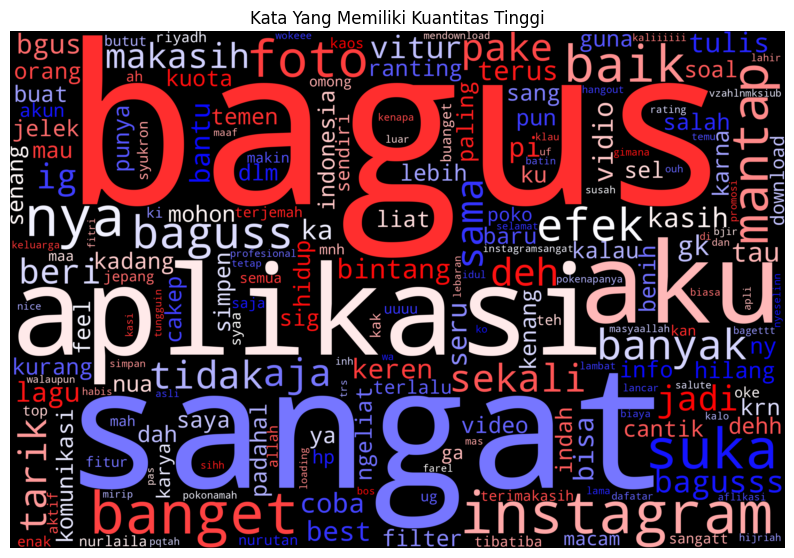

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


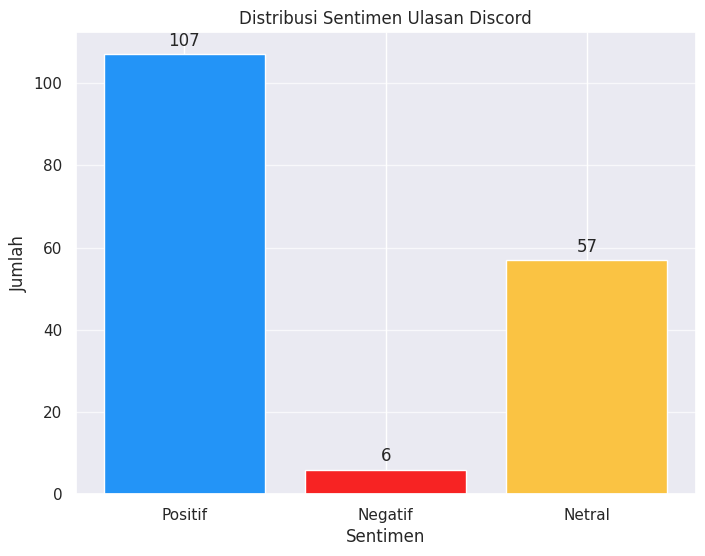

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [38]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,bagus banget,Very good.,Positif
2,sangatt bagus,Very good.,Positif
4,sangat bagus,Very good.,Positif
5,sangat bagus,Very good.,Positif
6,bagus saja tidak banyak omong,It's good. It's not much of a talk.,Positif
...,...,...,...
162,huhuhuhu baguss banget aplikasi buatt bagusin ...,"fontcolor="" # FFFF00""huhuhu fontcolor="" # FFFF...",Positif
163,bagus banget,Very good.,Positif
164,cakep,That's cute.,Positif
167,sangat seru publik bangetgg,It's so exciting.,Positif


In [39]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,bagus banget,Very good.,1
2,sangatt bagus,Very good.,1
4,sangat bagus,Very good.,1
5,sangat bagus,Very good.,1
6,bagus saja tidak banyak omong,It's good. It's not much of a talk.,1
...,...,...,...
162,huhuhuhu baguss banget aplikasi buatt bagusin ...,"fontcolor="" # FFFF00""huhuhu fontcolor="" # FFFF...",1
163,bagus banget,Very good.,1
164,cakep,That's cute.,1
167,sangat seru publik bangetgg,It's so exciting.,1


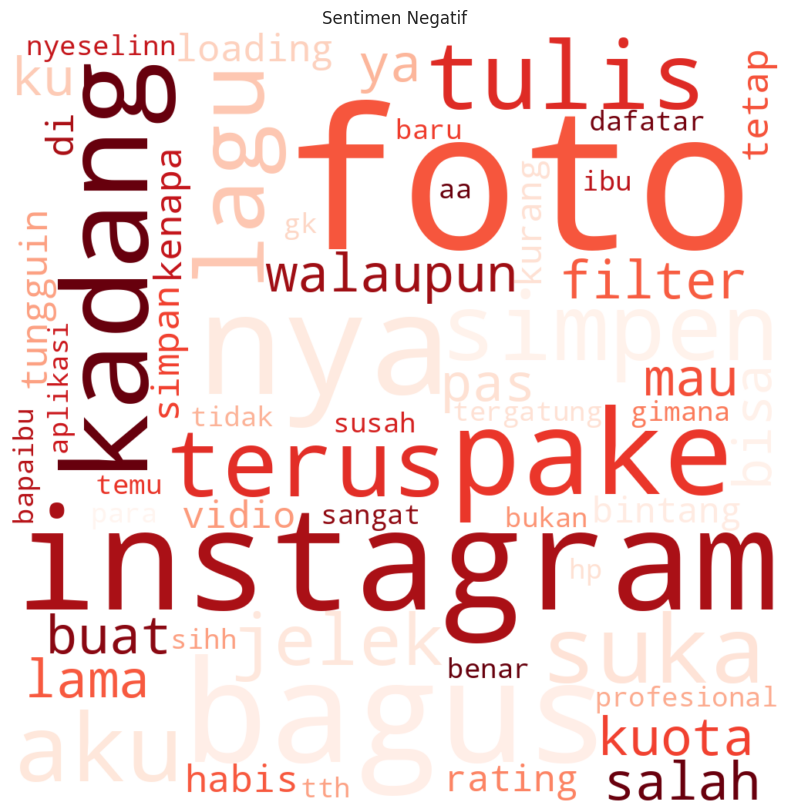

In [40]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

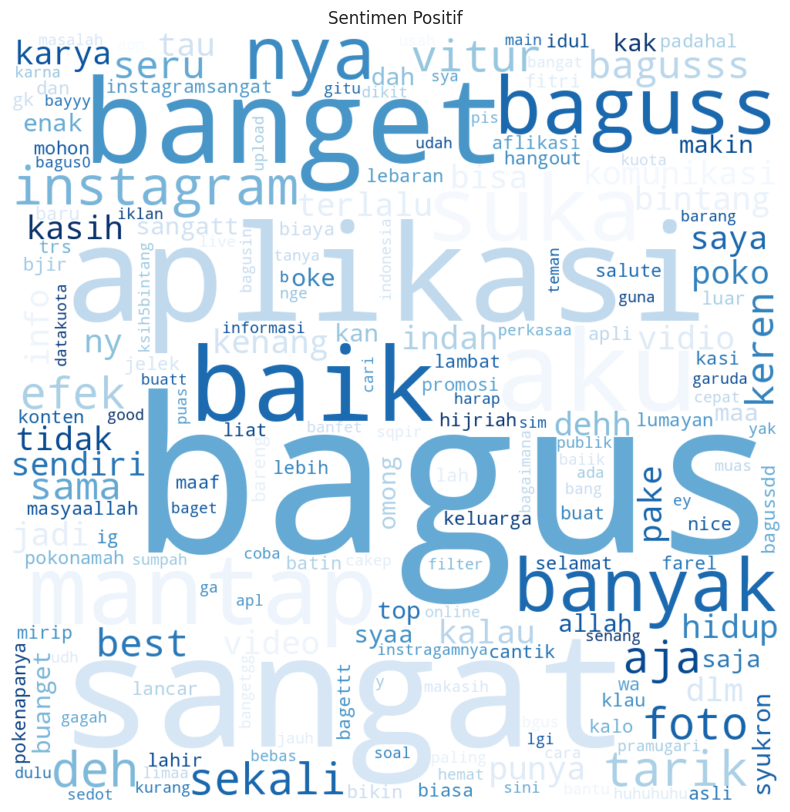

In [41]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [42]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

1    107
0      6
Name: sentimen, dtype: int64

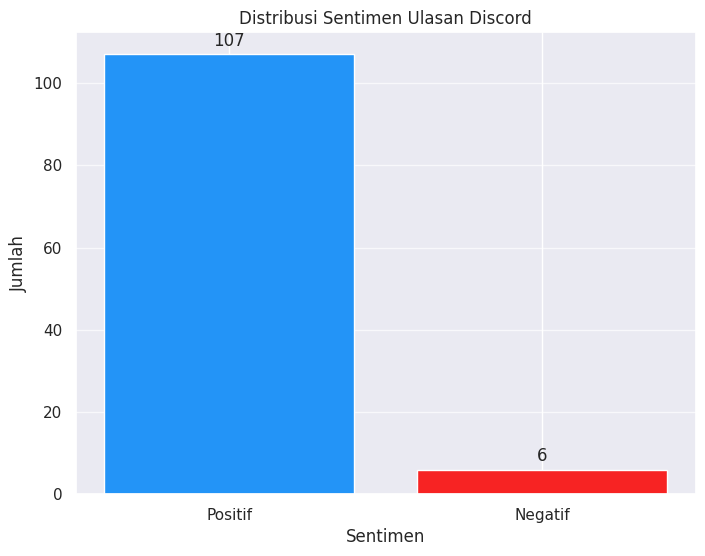

In [43]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [54]:
data

,content,content_en,sentimen
1,bagus banget,Very good.,1
2,sangatt bagus,Very good.,1
4,sangat bagus,Very good.,1
5,sangat bagus,Very good.,1
6,bagus saja tidak banyak omong,It's good. It's not much of a talk.,1
...,...,...,...
162,huhuhuhu baguss banget aplikasi buatt bagusin ...,"fontcolor="" # FFFF00""huhuhu fontcolor="" # FFFF...",1
163,bagus banget,Very good.,1
164,cakep,That's cute.,1
167,sangat seru publik bangetgg,It's so exciting.,1


In [58]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(k_neighbors=2, random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

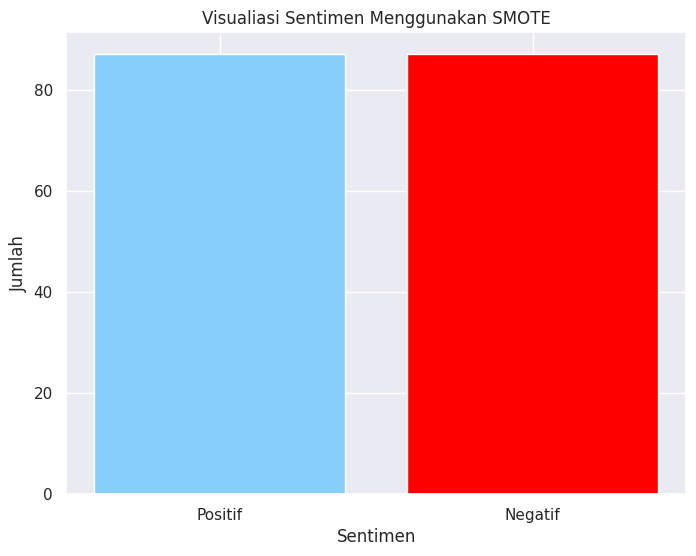

In [59]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [60]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [61]:
y_pred = naive_bayes.predict(X_test_vec)

In [62]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.782608695652174

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         3
     Positif       0.86      0.90      0.88        20

    accuracy                           0.78        23
   macro avg       0.43      0.45      0.44        23
weighted avg       0.75      0.78      0.76        23



# **Testing**


In [64]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : Aplikasinya bagus banget
Hasil Analisis Sentimen Untuk Teks Baru : Positif
